In [1]:

!pip install pyod


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184112 sha256=f7f567191607bf8d752332d319d4b2a6c1aa20d64aa58aaf8e51e1189f728c11
  Stored in directory: /root/.cache/pip/wheels/1b/9c/b8/9759d7cc64a1e01bb9872ade80cb7db445ccf506e083325106
Successfully built pyod


In [2]:
!pip install --upgrade pyod

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install kneed 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from pyod.models.abod import ABOD
from pyod.models.knn import KNN

In [5]:
data = pd.read_csv('CC GENERAL.csv')
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
data.drop('CUST_ID', axis = 1, inplace = True)

In [8]:
data.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

Based on the mean, and median values we noticed that ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES, CASH_ADVANCE, CASH_ADVANCE_TRX, and PURCHASES_TRX columns are skewed. 

#### **Early Visualizing**

In [9]:
plt.style.use('seaborn')

<ipython-input-9-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


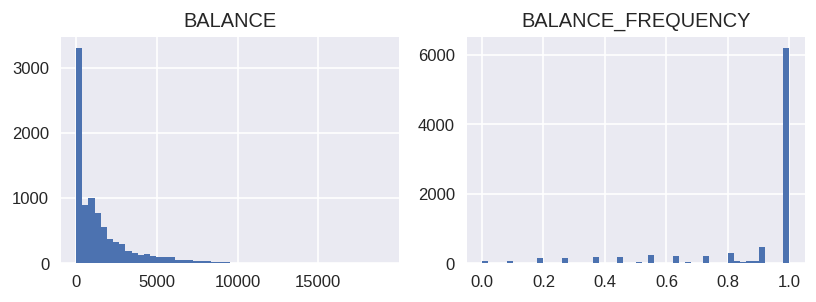

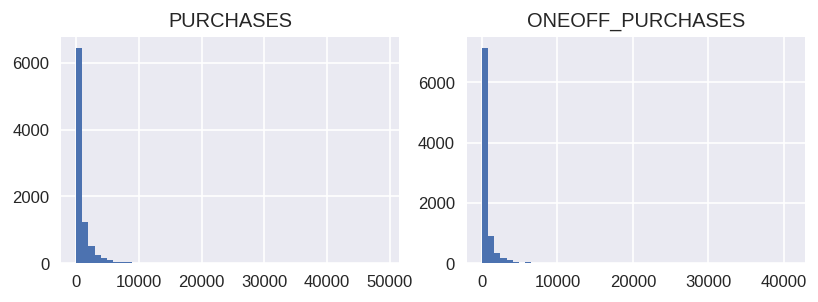

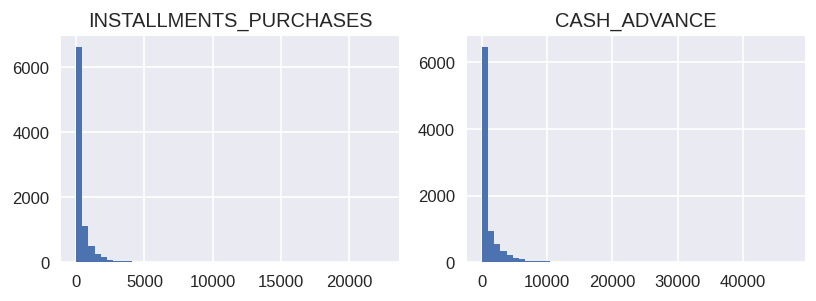

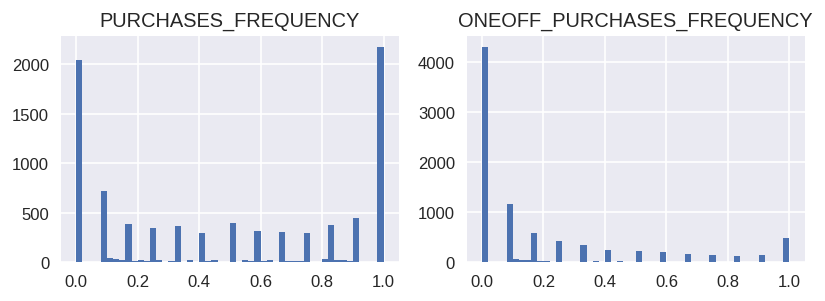

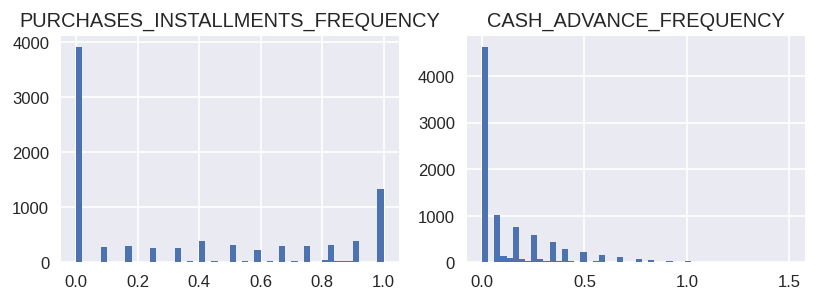

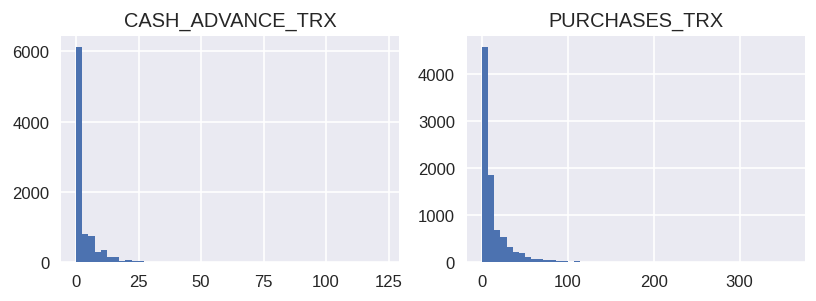

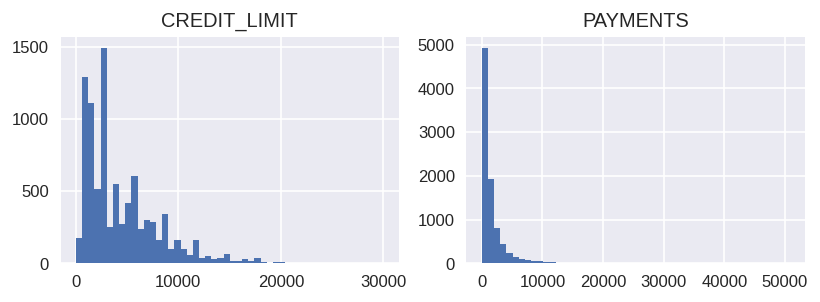

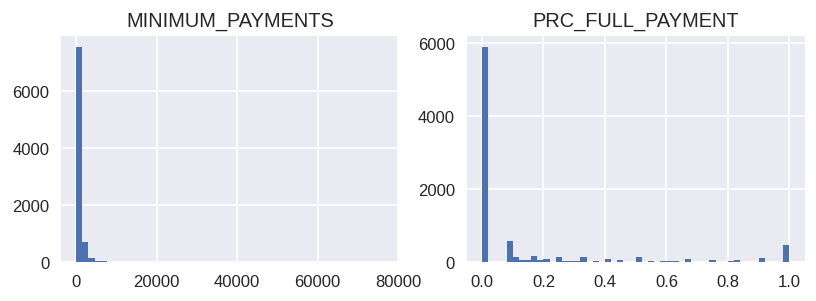

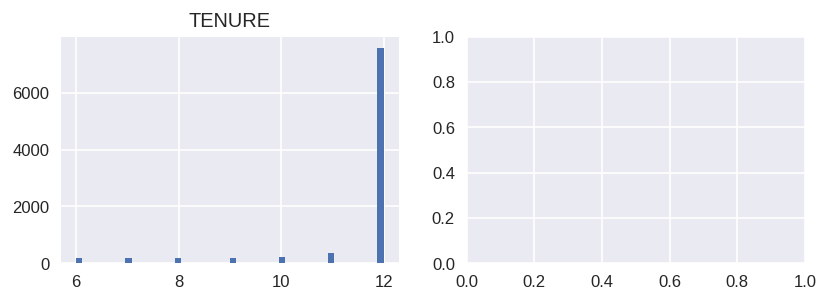

In [10]:
i = 0
while i < len(data.columns):
    try:
        fig = plt.figure(figsize = (8, 2.5), dpi = 120)
        plt.subplot(1,2,1)
        plt.hist(data[data.columns[i]], bins = 50)
        plt.title(data.columns[i])
        i += 1
        plt.subplot(1,2,2)
        plt.hist(data[data.columns[i]], bins = 50)
        plt.title(data.columns[i])
        i += 1
    except:
        continue
plt.show()

The plots show that the data are skewed. So we have to deal with outlier.

<function matplotlib.pyplot.show(close=None, block=None)>

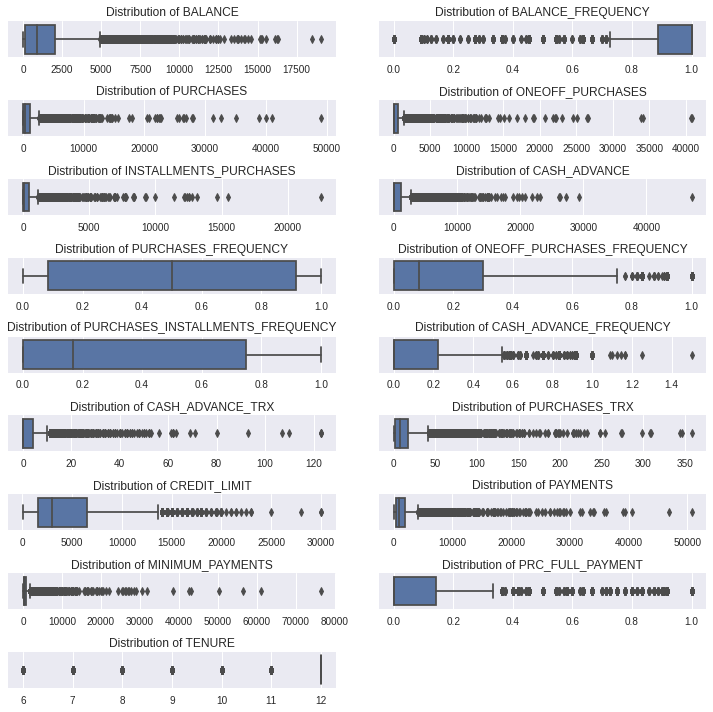

In [11]:
fig = plt.figure(figsize=(10,10))
for i,columns in enumerate(data.columns, 1):
    ax = plt.subplot(9,2,i)
    sns.boxplot(data = data, x = data[columns],)
    ax.set_xlabel(None)
    ax.set_title (f'Distribution of {columns}')
    plt.tight_layout(w_pad = 3)
plt.show

#### **Handling Missing Values**

In [12]:
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
data[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']].describe()

CREDIT_LIMIT  MINIMUM_PAYMENTS
count   8949.000000       8637.000000
mean    4494.449450        864.206542
std     3638.815725       2372.446607
min       50.000000          0.019163
25%     1600.000000        169.123707
50%     3000.000000        312.343947
75%     6500.000000        825.485459
max    30000.000000      76406.207520

In [14]:
mask = data['CREDIT_LIMIT'].isnull()
data[mask]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [15]:
data = data[mask == False]
data.reset_index(drop = True, inplace = True)


In [16]:
mask = data['MINIMUM_PAYMENTS'].isnull()
data[mask].describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   313.000000         313.000000   313.000000        313.000000   
mean    555.441321           0.389403   393.087284        250.433387   
std    1292.687887           0.408341   757.905701        624.453991   
min       0.000000           0.000000     0.000000          0.000000   
25%       0.187069           0.090909     1.400000          0.000000   
50%      16.848358           0.181818   130.400000          0.000000   
75%     286.686616           1.000000   399.950000        176.030000   
max    9164.724752           1.000000  7597.090000       6761.290000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              313.000000    313.000000           313.000000   
mean               142.653898    559.136698             0.336043   
std                311.289043   1185.132567             0.372517   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                  0.000000      0.000000             0.166667   
75%                152.280000    480.104401             0.583333   
max               2959.240000   7616.064965             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  313.000000                        313.000000   
mean                     0.107886                          0.244670   
std                      0.227370                          0.359756   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.083333                          0.416667   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              313.000000        313.000000     313.000000    313.000000   
mean                 0.067169          1.460064       5.833866   3731.789137   
std                  0.130087          3.182359       9.600908   2924.606153   
min                  0.000000          0.000000       0.000000    500.000000   
25%                  0.000000          0.000000       1.000000   1500.000000   
50%                  0.000000          0.000000       2.000000   3000.000000   
75%                  0.083333          1.000000       8.000000   5000.000000   
max                  1.000000         21.000000      77.000000  19500.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    313.000000               0.0             313.0  313.000000  
mean     322.286168               NaN               0.0   11.063898  
std     1996.658905               NaN               0.0    1.869734  
min        0.000000               NaN               0.0    6.000000  
25%        0.000000               NaN               0.0   12.000000  
50%        0.000000               NaN               0.0   12.000000  
75%        0.000000               NaN               0.0   12.000000  
max    29272.486070               NaN               0.0   12.000000

In [17]:
mask_1 = data['MINIMUM_PAYMENTS'].notnull()
mask_2 = data['PRC_FULL_PAYMENT'] == 0
len(data[mask_1][mask_2])

<ipython-input-17-efb19ab37ddb>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(data[mask_1][mask_2])


5589

In [18]:
data.shape[0]

8949

In [19]:
data.dropna().describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.571300           0.207697   2167.107984       1684.307803   
min        0.000000           0.000000      0.000000          0.000000   
25%      148.095189           0.909091     43.367500          0.000000   
50%      916.855459           1.000000    375.405000         44.995000   
75%     2105.195853           1.000000   1145.980000        599.100000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8636.000000   8636.000000          8636.000000   
mean               420.843533    994.175523             0.496000   
std                917.245182   2121.458303             0.401273   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.785000      0.000000             0.500000   
75%                484.147500   1132.385490             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8636.000000                       8636.000000   
mean                     0.205909                          0.368820   
std                      0.300054                          0.398093   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8636.000000       8636.000000    8636.000000   8636.000000   
mean                 0.137604          3.313918      15.033233   4522.091030   
std                  0.201791          6.912506      25.180468   3659.240379   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8636.000000       8636.000000       8636.000000  8636.000000  
mean    1784.478099        864.304943          0.159304    11.534391  
std     2909.810090       2372.566350          0.296271     1.310984  
min        0.049513          0.019163          0.000000     6.000000  
25%      418.559237        169.163545          0.000000    12.000000  
50%      896.675701        312.452292          0.000000    12.000000  
75%     1951.142090        825.496463          0.166667    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [20]:
data.corr().loc['MINIMUM_PAYMENTS'].sort_values(ascending = False)

MINIMUM_PAYMENTS                    1.000000
BALANCE                             0.398669
CASH_ADVANCE                        0.140094
BALANCE_FREQUENCY                   0.132519
INSTALLMENTS_PURCHASES              0.132156
CREDIT_LIMIT                        0.126671
PAYMENTS                            0.126630
CASH_ADVANCE_TRX                    0.109727
CASH_ADVANCE_FREQUENCY              0.098844
PURCHASES_TRX                       0.096311
PURCHASES                           0.093842
TENURE                              0.059330
ONEOFF_PURCHASES                    0.048741
PURCHASES_INSTALLMENTS_FREQUENCY    0.030036
PURCHASES_FREQUENCY                 0.002979
ONEOFF_PURCHASES_FREQUENCY         -0.030357
PRC_FULL_PAYMENT                   -0.140404
Name: MINIMUM_PAYMENTS, dtype: float64

In [21]:
data.dropna(inplace = True)
data.reset_index(drop = True, inplace = True)
data

<ipython-input-21-127da9b21831>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8631     5.871712           0.500000      20.90             20.90   
8632    28.493517           1.000000     291.12              0.00   
8633    23.398673           0.833333     144.40              0.00   
8634    13.457564           0.833333       0.00              0.00   
8635   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8631                    0.00      0.000000             0.166667   
8632                  291.12      0.000000             1.000000   
8633                  144.40      0.000000             0.833333   
8634                    0.00     36.558778             0.000000   
8635                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8631                    0.166667                          0.000000   
8632                    0.000000                          0.833333   
8633                    0.000000                          0.666667   
8634                    0.000000                          0.000000   
8635                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8631                0.000000                 0              1         500.0   
8632                0.000000                 0              6        1000.0   
8633                0.000000                 0              5        1000.0   
8634                0.166667                 2              0         500.0   
8635                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3      678.334763        244.791237          0.000000      12  
4     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8631    58.644883         43.473717          0.000000       6  
8632   325.594462         48.886365          0.500000       6  
8633    81

CRIDIT_LIMIT column has only one missing value, and depending on the values in this row we decided to remove this row, because it is located in a density area.

MINIMUM_PAYMENTS column has 313 missing value. 
We showed the describe table for the null values, and we noticed that PRC_FULL_PAYMENT values are all zero. Then we noticed that the not null values of this column that has zero PRC_FULL_PAYMENT value are 5589 rows. And there is no difference between statistics with or without these 313 rows, so we dropped them.


#### **Handling Noises and Outliers**

Using statistical approach depinding on plots, and data describe method.

<function matplotlib.pyplot.show(close=None, block=None)>

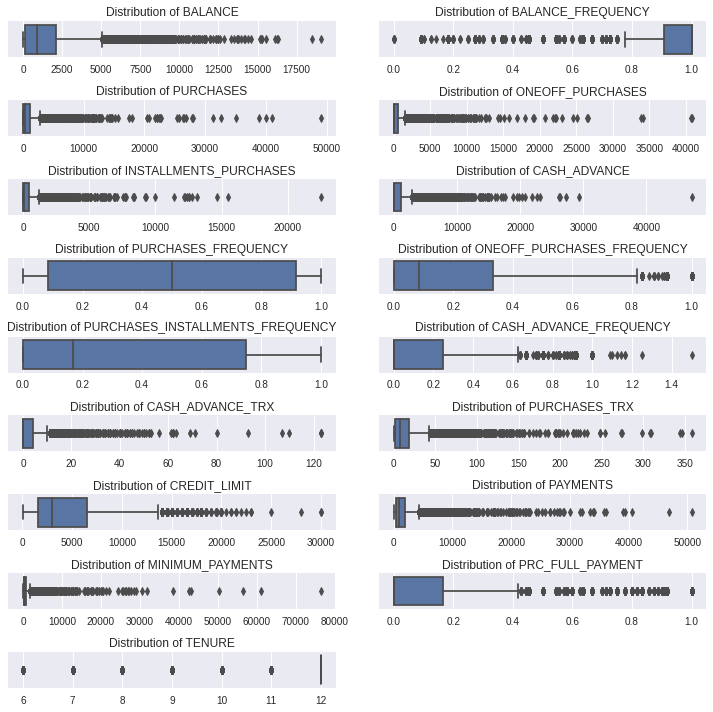

In [22]:
fig = plt.figure(figsize=(10,10))
for i,columns in enumerate(data.columns, 1):
    ax = plt.subplot(9,2,i)
    sns.boxplot(data = data, x = data[columns],)
    ax.set_xlabel(None)
    ax.set_title (f'Distribution of {columns}')
    plt.tight_layout(w_pad = 3)
plt.show


    Outliers of each feature :
    -- BALANCE > 17500
    -- BALANCE_FREQUENCY == 0
    -- PURCHASES > 30000
    -- ONEOFF_PURCHASES > 30000
    -- INSTALLMENTS_PURCHASES > 20000
    -- CASH_ADVANCE > 40000
    -- CASH_ADVANCE_FREQUENCY > 1.4
    -- CASH_ADVANCE_TRX > 80
    -- CREDIT_LIMIT >= 25000
    -- PAYMENTS > 45000
    -- MINIMUM_PAYMENTS > 35000



In [23]:
data['BALANCE'].nlargest(10)

122     19043.13856
3992    18495.55855
5309    16304.88925
6410    16259.44857
5107    16115.59640
2252    15532.33972
482     15258.22590
546     15244.74865
4553    15155.53286
825     14581.45914
Name: BALANCE, dtype: float64

<Axes: >

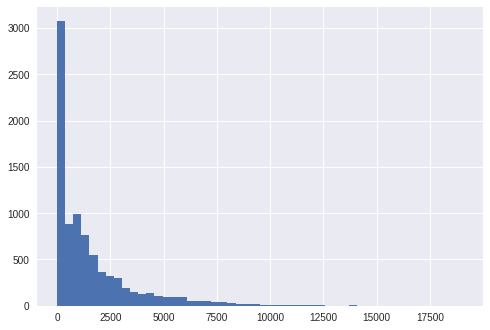

In [24]:
data['BALANCE'].hist(bins = 50)

In [25]:
mask = data['BALANCE'] <= 17500
data[mask]['BALANCE'].describe()

count     8634.000000
mean      1597.248028
std       2079.451860
min          0.000000
25%        147.923961
50%        916.693628
75%       2100.631605
max      16304.889250
Name: BALANCE, dtype: float64

In [26]:
data['BALANCE'].describe()

count     8636.000000
mean      1601.224893
std       2095.571300
min          0.000000
25%        148.095189
50%        916.855459
75%       2105.195853
max      19043.138560
Name: BALANCE, dtype: float64

In [27]:
mask = data['BALANCE_FREQUENCY'] < 0.1
sum(mask)

31

In [28]:
data['BALANCE_FREQUENCY'].nsmallest(10)

1480    0.000000
4779    0.000000
6824    0.000000
7201    0.000000
7429    0.000000
7584    0.000000
181     0.090909
695     0.090909
723     0.090909
1014    0.090909
Name: BALANCE_FREQUENCY, dtype: float64

<Axes: >

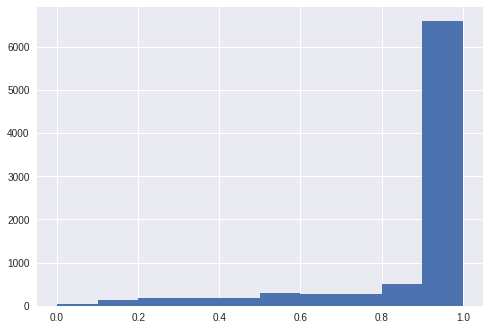

In [29]:
data['BALANCE_FREQUENCY'].hist(bins = 10)

In [30]:
mask = data['BALANCE_FREQUENCY'] == 0
data[mask == False]['BALANCE_FREQUENCY'].describe()

count    8630.000000
mean        0.895657
std         0.206423
min         0.090909
25%         0.909091
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

In [31]:
data['BALANCE_FREQUENCY'].describe()

count    8636.000000
mean        0.895035
std         0.207697
min         0.000000
25%         0.909091
50%         1.000000
75%         1.000000
max         1.000000
Name: BALANCE_FREQUENCY, dtype: float64

In [32]:
data['PURCHASES'].nlargest(10)

512     49039.57
464     41050.40
1166    40040.71
1509    38902.71
3792    35131.16
246     32539.78
1545    31299.35
548     27957.68
3564    27790.42
6818    26784.62
Name: PURCHASES, dtype: float64

<Axes: >

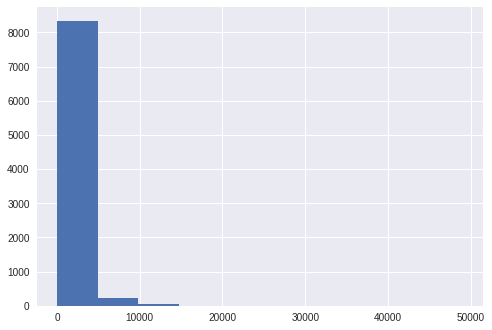

In [33]:
data['PURCHASES'].hist(bins = 10)

In [34]:
data['PURCHASES'].describe()

count     8636.000000
mean      1025.433874
std       2167.107984
min          0.000000
25%         43.367500
50%        375.405000
75%       1145.980000
max      49039.570000
Name: PURCHASES, dtype: float64

In [35]:
mask = data['PURCHASES'] > 30000
data[mask == False]['PURCHASES'].describe()

count     8629.000000
mean       995.207238
std       1883.487877
min          0.000000
25%         43.250000
50%        374.950000
75%       1141.240000
max      27957.680000
Name: PURCHASES, dtype: float64

In [36]:
data[mask]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
246    5131.319584                1.0   32539.78          26547.43   
464   13479.288210                1.0   41050.40          40624.06   
512   11547.520010                1.0   49039.57          40761.25   
1166   4010.621974                1.0   40040.71          24543.52   
1509   3391.702180                1.0   38902.71          33803.84   
1545   3454.094319                1.0   31299.35          19064.30   
3792   2997.977825                1.0   35131.16          34087.73   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
246                  5992.35      0.000000             1.000000   
464                   426.34      0.000000             0.833333   
512                  8278.32    558.166886             1.000000   
1166                15497.19      0.000000             1.000000   
1509                 5098.87      0.000000             1.000000   
1545                12235.05      0.000000             1.000000   
3792                 1043.43      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
246                     1.000000                          1.000000   
464                     0.666667                          0.416667   
512                     1.000000                          0.916667   
1166                    1.000000                          1.000000   
1509                    1.000000                          1.000000   
1545                    0.666667                          0.833333   
3792                    1.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
246                 0.000000                 0             98       11500.0   
464                 0.000000                 0            157       17000.0   
512                 0.083333                 1            101       22500.0   
1166                0.000000                 0            358       18000.0   
1509                0.000000                 0            195       18000.0   
1545                0.000000                 0            121        7500.0   
3792                0.000000                 0            344       12000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
246   26652.34432       1971.129435          0.083333      12  
464   36066.75068      15914.484620          0.083333      12  
512   46930.59824       2974.069421          0.250000      12  
1166  33994.72785        703.503256          1.000000      12  
1509  35843.62593        716.027656          1.000000      12  
1545  22542.58705       1193.031030          0.583333      12  
3792  28896.66522        767.014180          0.750000      12

In [37]:
data['ONEOFF_PURCHASES'].nlargest(10)

512     40761.25
464     40624.06
3792    34087.73
1509    33803.84
246     26547.43
6818    26514.32
1355    25122.77
1166    24543.52
548     23032.97
470     22257.39
Name: ONEOFF_PURCHASES, dtype: float64

<Axes: >

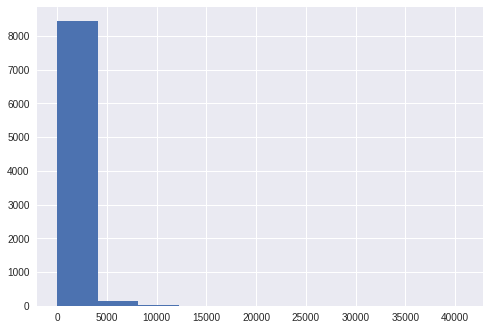

In [38]:
data['ONEOFF_PURCHASES'].hist(bins = 10)

In [39]:
mask = data['ONEOFF_PURCHASES'] > 30000
data[mask]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
464   13479.288210                1.0   41050.40          40624.06   
512   11547.520010                1.0   49039.57          40761.25   
1509   3391.702180                1.0   38902.71          33803.84   
3792   2997.977825                1.0   35131.16          34087.73   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
464                   426.34      0.000000             0.833333   
512                  8278.32    558.166886             1.000000   
1509                 5098.87      0.000000             1.000000   
3792                 1043.43      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
464                     0.666667                          0.416667   
512                     1.000000                          0.916667   
1509                    1.000000                          1.000000   
3792                    1.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
464                 0.000000                 0            157       17000.0   
512                 0.083333                 1            101       22500.0   
1509                0.000000                 0            195       18000.0   
3792                0.000000                 0            344       12000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
464   36066.75068      15914.484620          0.083333      12  
512   46930.59824       2974.069421          0.250000      12  
1509  35843.62593        716.027656          1.000000      12  
3792  28896.66522        767.014180          0.750000      12

In [40]:
data['ONEOFF_PURCHASES'].describe()

count     8636.000000
mean       604.901438
std       1684.307803
min          0.000000
25%          0.000000
50%         44.995000
75%        599.100000
max      40761.250000
Name: ONEOFF_PURCHASES, dtype: float64

In [41]:
data[mask == False]['ONEOFF_PURCHASES'].describe()

count     8632.000000
mean       587.888316
std       1485.914085
min          0.000000
25%          0.000000
50%         44.850000
75%        598.037500
max      26547.430000
Name: ONEOFF_PURCHASES, dtype: float64

In [42]:
data['INSTALLMENTS_PURCHASES'].nlargest(5)

5086    22500.00
1166    15497.19
3059    14686.10
3564    13184.43
2707    12738.47
Name: INSTALLMENTS_PURCHASES, dtype: float64

<Axes: >

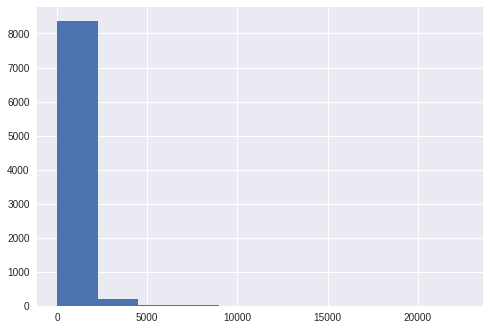

In [43]:
data['INSTALLMENTS_PURCHASES'].hist(bins = 10)

In [44]:
data['INSTALLMENTS_PURCHASES'].describe()

count     8636.000000
mean       420.843533
std        917.245182
min          0.000000
25%          0.000000
50%         94.785000
75%        484.147500
max      22500.000000
Name: INSTALLMENTS_PURCHASES, dtype: float64

In [45]:
mask = data['INSTALLMENTS_PURCHASES'] < 20000
data[mask]['INSTALLMENTS_PURCHASES'].describe()

count     8635.000000
mean       418.286595
std        885.984236
min          0.000000
25%          0.000000
50%         94.710000
75%        483.680000
max      15497.190000
Name: INSTALLMENTS_PURCHASES, dtype: float64

In [46]:
data.sort_values(by = 'INSTALLMENTS_PURCHASES', ascending = False).head(1)

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5086  4060.710208           0.727273    22500.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5086                 22500.0           0.0                  0.5   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5086                         0.0                          0.416667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5086                     0.0                 0             12       23000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5086  8760.860264       1645.535202               0.0      12

In [47]:
data['CASH_ADVANCE'].nlargest(5)

2054    47137.21176
977     29282.10915
64      27296.48576
7022    26268.69989
7402    26194.04954
Name: CASH_ADVANCE, dtype: float64

<Axes: >

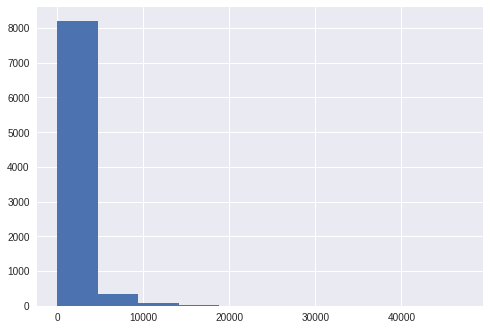

In [48]:
data['CASH_ADVANCE'].hist(bins = 10)

In [49]:
data['CASH_ADVANCE'].describe()

count     8636.000000
mean       994.175523
std       2121.458303
min          0.000000
25%          0.000000
50%          0.000000
75%       1132.385490
max      47137.211760
Name: CASH_ADVANCE, dtype: float64

In [50]:
mask = data['CASH_ADVANCE'] < 45000
data[mask]['CASH_ADVANCE'].describe()

count     8635.000000
mean       988.831801
std       2062.637616
min          0.000000
25%          0.000000
50%          0.000000
75%       1131.895249
max      29282.109150
Name: CASH_ADVANCE, dtype: float64

In [51]:
data.iloc[2054]

BALANCE                             10905.053810
BALANCE_FREQUENCY                       1.000000
PURCHASES                             431.930000
ONEOFF_PURCHASES                      133.500000
INSTALLMENTS_PURCHASES                298.430000
CASH_ADVANCE                        47137.211760
PURCHASES_FREQUENCY                     0.583333
ONEOFF_PURCHASES_FREQUENCY              0.250000
PURCHASES_INSTALLMENTS_FREQUENCY        0.500000
CASH_ADVANCE_FREQUENCY                  1.000000
CASH_ADVANCE_TRX                      123.000000
PURCHASES_TRX                          21.000000
CREDIT_LIMIT                        19600.000000
PAYMENTS                            39048.597620
MINIMUM_PAYMENTS                     5394.173671
PRC_FULL_PAYMENT                        0.000000
TENURE                                 12.000000
Name: 2054, dtype: float64

In [52]:
data['CASH_ADVANCE_FREQUENCY'].nlargest(5)

2919    1.500000
640     1.250000
1530    1.166667
3129    1.166667
8086    1.142857
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

<Axes: >

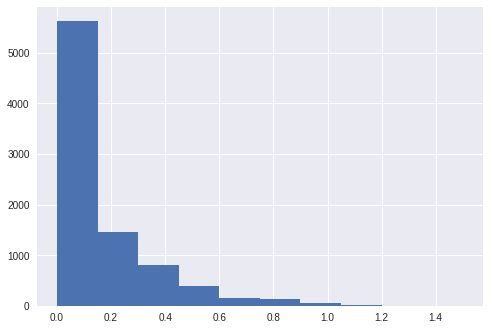

In [53]:
data['CASH_ADVANCE_FREQUENCY'].hist(bins = 10)

In [54]:
data['CASH_ADVANCE_FREQUENCY'].describe()

count    8636.000000
mean        0.137604
std         0.201791
min         0.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.500000
Name: CASH_ADVANCE_FREQUENCY, dtype: float64

In [55]:
data['CASH_ADVANCE_TRX'].nlargest(10)

504     123
2054    123
8039    123
3417    110
1812    107
5113     93
5145     80
4951     71
7402     69
3137     63
Name: CASH_ADVANCE_TRX, dtype: int64

In [56]:
data['CASH_ADVANCE_TRX'].nlargest(10)

504     123
2054    123
8039    123
3417    110
1812    107
5113     93
5145     80
4951     71
7402     69
3137     63
Name: CASH_ADVANCE_TRX, dtype: int64

In [57]:
data.iloc[[504, 2054, 8039, 3417, 1812, 5113]]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
504    1284.633140           1.000000      55.50              0.00   
2054  10905.053810           1.000000     431.93            133.50   
8039   2648.244646           1.000000       0.00              0.00   
3417   4175.826879           1.000000       0.00              0.00   
1812   1856.325339           0.818182     670.50            516.90   
5113   7268.706380           1.000000     306.91            306.91   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
504                    55.50   5406.459348             0.083333   
2054                  298.43  47137.211760             0.583333   
8039                    0.00  10458.978150             0.000000   
3417                    0.00   9968.184827             0.000000   
1812                  153.60   5603.126858             0.545455   
5113                    0.00  12702.427700             0.272727   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
504                     0.000000                          0.083333   
2054                    0.250000                          0.500000   
8039                    0.000000                          0.000000   
3417                    0.000000                          0.000000   
1812                    0.272727                          0.363636   
5113                    0.272727                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
504                 0.833333               123              1        3000.0   
2054                1.000000               123             21       19600.0   
8039                1.000000               123              0        4000.0   
3417                0.909091               110              0       10500.0   
1812                0.727273               107              9        7000.0   
5113                1.000000                93              4       12000.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
504    3432.757202        421.385587          0.000000      12  
2054  39048.597620       5394.173671          0.000000      12  
8039   9818.531412        665.888853          0.000000      12  
3417   1083.433387       1000.206323          0.000000      11  
1812   9221.922948        537.180986          0.142857      11  
5113   3512.633784       2096.962594          0.000000      11

<Axes: >

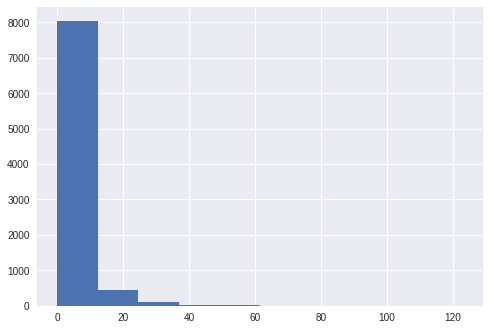

In [58]:
data['CASH_ADVANCE_TRX'].hist(bins = 10)

In [59]:
data['CASH_ADVANCE_TRX'].describe()

count    8636.000000
mean        3.313918
std         6.912506
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max       123.000000
Name: CASH_ADVANCE_TRX, dtype: float64

In [60]:
mask = data['CASH_ADVANCE_TRX'] <= 80
data[mask]['CASH_ADVANCE_TRX'].describe()

count    8630.000000
mean        3.237543
std         6.271590
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max        80.000000
Name: CASH_ADVANCE_TRX, dtype: float64

In [61]:
data['CREDIT_LIMIT'].nlargest(10)

4747    30000.0
6818    30000.0
900     28000.0
3527    25000.0
176     23000.0
5086    23000.0
512     22500.0
3992    22000.0
126     21500.0
1422    21500.0
Name: CREDIT_LIMIT, dtype: float64

In [62]:
data['PAYMENTS'].nlargest(10)

4072    50721.48336
512     46930.59824
4514    40627.59524
5183    39461.96580
2054    39048.59762
464     36066.75068
1509    35843.62593
2797    34107.07499
1166    33994.72785
6159    33486.31044
Name: PAYMENTS, dtype: float64

In [63]:
data.iloc[[512, 4072]]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
512   11547.520010           1.000000   49039.57          40761.25   
4072   1268.809031           0.272727   17945.00          17945.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
512                  8278.32    558.166886             1.000000   
4072                    0.00      0.000000             0.166667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
512                     1.000000                          0.916667   
4072                    0.166667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
512                 0.083333                 1            101       22500.0   
4072                0.000000                 0              3       18000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
512   46930.59824       2974.069421              0.25      12  
4072  50721.48336       1149.747342              0.00      12

<Axes: >

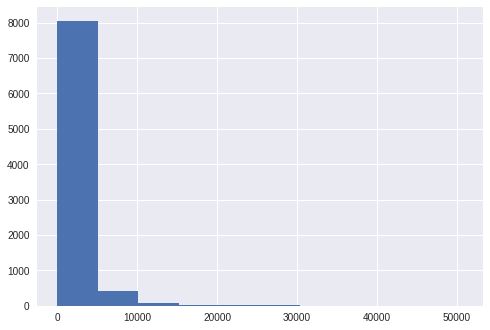

In [64]:
data['PAYMENTS'].hist(bins = 10)

In [65]:
data['PAYMENTS'].describe()

count     8636.000000
mean      1784.478099
std       2909.810090
min          0.049513
25%        418.559237
50%        896.675701
75%       1951.142090
max      50721.483360
Name: PAYMENTS, dtype: float64

In [66]:
mask = data['PAYMENTS'] < 45000
data[mask]['PAYMENTS'].describe()

count     8634.000000
mean      1773.581281
std       2820.521674
min          0.049513
25%        418.484380
50%        895.707030
75%       1947.827567
max      40627.595240
Name: PAYMENTS, dtype: float64

In [67]:
data['MINIMUM_PAYMENTS'].nlargest(10)

4226    76406.20752
6902    61031.61860
5474    56370.04117
4311    50260.75947
5640    43132.72823
5775    42629.55117
529     38512.12477
5124    31871.36379
1045    30528.43240
6416    29019.80288
Name: MINIMUM_PAYMENTS, dtype: float64

<Axes: >

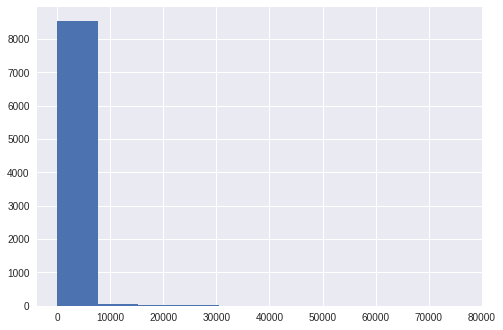

In [68]:
data['MINIMUM_PAYMENTS'].hist(bins = 10)

In [69]:
data['MINIMUM_PAYMENTS'].describe()

count     8636.000000
mean       864.304943
std       2372.566350
min          0.019163
25%        169.163545
50%        312.452292
75%        825.496463
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [70]:
mask = data['MINIMUM_PAYMENTS'] > 35000
data[mask == False]['MINIMUM_PAYMENTS'].describe()

count     8629.000000
mean       822.319441
std       1826.881731
min          0.019163
25%        169.079690
50%        311.963409
75%        819.267218
max      31871.363790
Name: MINIMUM_PAYMENTS, dtype: float64

In [71]:
data[mask]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
529    3457.086184                1.0    2448.60               0.0   
4226  10571.411070                1.0    7739.48               0.0   
4311   4976.028578                1.0     900.87               0.0   
5474   4628.109931                1.0     912.54               0.0   
5640   8038.893195                1.0       0.00               0.0   
5775   6022.224462                1.0       0.00               0.0   
6902   9024.812044                1.0       0.00               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
529                  2448.60      0.000000                  1.0   
4226                 7739.48      0.000000                  1.0   
4311                  900.87      0.000000                  1.0   
5474                  912.54      0.000000                  1.0   
5640                    0.00    197.915586                  0.0   
5775                    0.00   4111.465632                  0.0   
6902                    0.00   2750.442399                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
529                          0.0                               1.0   
4226                         0.0                               1.0   
4311                         0.0                               1.0   
5474                         0.0                               1.0   
5640                         0.0                               0.0   
5775                         0.0                               0.0   
6902                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
529                 0.000000                 0             12        1700.0   
4226                0.000000                 0             44        8000.0   
4311                0.000000                 0            162        5500.0   
5474                0.000000                 0             21        5000.0   
5640                0.166667                 8              0        9000.0   
5775                0.166667                 6              0        7000.0   
6902                0.083333                 2              0        9000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
529    227.514473       38512.12477               0.0      12  
4226  2688.447014       76406.20752               0.0      12  
4311    92.865469       50260.75947               0.0      12  
5474  3746.305759       56370.04117               0.0      12  
5640  3569.182969       43132.72823               0.0      12  
5775  4560.775720       42629.55117               0.0      12  
6902   302.484224       61031.61860               0.0      12

In [72]:
mask = data['MINIMUM_PAYMENTS'] > 50000
data[mask == False]['MINIMUM_PAYMENTS'].describe()

count     8632.000000
mean       836.430591
std       1977.534021
min          0.019163
25%        169.112703
50%        312.096808
75%        821.776198
max      43132.728230
Name: MINIMUM_PAYMENTS, dtype: float64

In [73]:
kmeans_constants = {'n_init' : 100, 'random_state' : 1}

In [74]:
df_1 = data.drop([246, 464, 512, 1166, 1509, 1545, 3792, 3792, 5086, 2054, 504, 8039, 3417, 1812, 5113,
                  4072, 4226, 6902, 5474, 4311])
df_1.reset_index(drop = True, inplace = True)
df_1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3      817.714335           1.000000      16.00             16.00   
4     1809.828751           1.000000    1333.28              0.00   
...           ...                ...        ...               ...   
8612     5.871712           0.500000      20.90             20.90   
8613    28.493517           1.000000     291.12              0.00   
8614    23.398673           0.833333     144.40              0.00   
8615    13.457564           0.833333       0.00              0.00   
8616   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00      0.000000             0.083333   
4                    1333.28      0.000000             0.666667   
...                      ...           ...                  ...   
8612                    0.00      0.000000             0.166667   
8613                  291.12      0.000000             1.000000   
8614                  144.40      0.000000             0.833333   
8615                    0.00     36.558778             0.000000   
8616                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.000000                          0.583333   
...                          ...                               ...   
8612                    0.166667                          0.000000   
8613                    0.000000                          0.833333   
8614                    0.000000                          0.666667   
8615                    0.000000                          0.000000   
8616                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.000000                 0              1        1200.0   
4                   0.000000                 0              8        1800.0   
...                      ...               ...            ...           ...   
8612                0.000000                 0              1         500.0   
8613                0.000000                 0              6        1000.0   
8614                0.000000                 0              5        1000.0   
8615                0.166667                 2              0         500.0   
8616                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3      678.334763        244.791237          0.000000      12  
4     1400.057770       2407.246035          0.000000      12  
...           ...               ...               ...     ...  
8612    58.644883         43.473717          0.000000       6  
8613   325.594462         48.886365          0.500000       6  
8614    81

<function matplotlib.pyplot.show(close=None, block=None)>

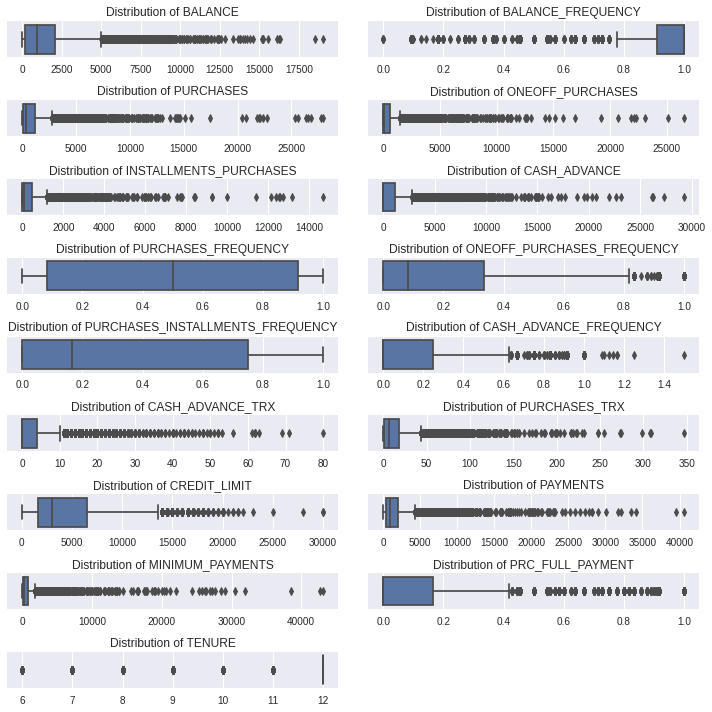

In [75]:
fig = plt.figure(figsize=(10,10))
for i,columns in enumerate(df_1.columns, 1):
    ax = plt.subplot(9,2,i)
    sns.boxplot(data = df_1, x = df_1[columns],)
    ax.set_xlabel(None)
    ax.set_title (f'Distribution of {columns}')
    plt.tight_layout(w_pad = 3)
plt.show

Dealing with outliers using Z_score

In [76]:
df_2 = df_1.copy()

In [77]:
from scipy import stats

for i in df_1.columns:
    df_2['z_scores'] =  stats.zscore(df_1[i])
    upper = df_2[df_2['z_scores'] > 3].index
    df_2.drop(index=upper, inplace=True)
    lower = df_2[df_2['z_scores'] < -3].index
    df_2.drop(index=lower, inplace=True)
df_2.drop('z_scores', axis=1, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

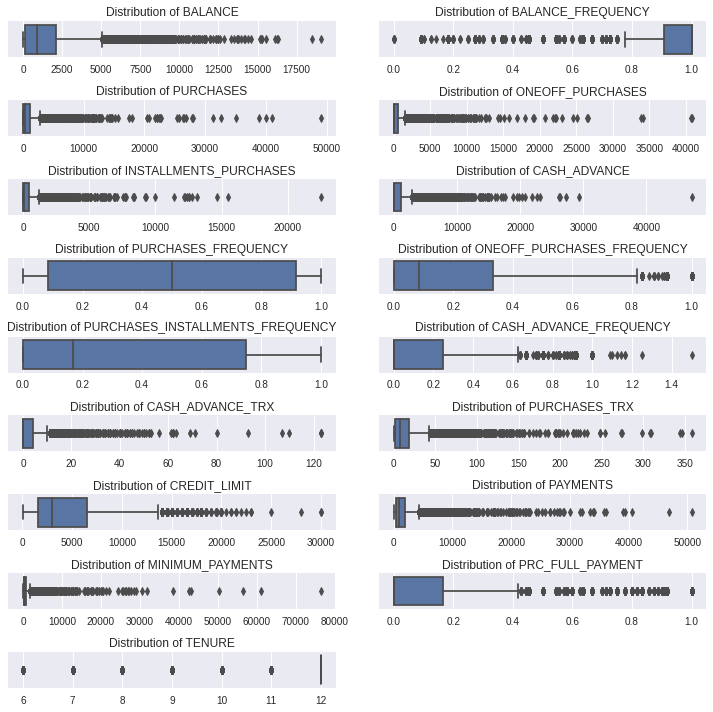

In [78]:
fig = plt.figure(figsize=(10,10))
for i,columns in enumerate(df_2.columns, 1):
    ax = plt.subplot(9,2,i)
    sns.boxplot(data = data, x = data[columns],)
    ax.set_xlabel(None)
    ax.set_title (f'Distribution of {columns}')
    plt.tight_layout(w_pad = 3)
plt.show

Dealing with outliers using upper and lower limits, and turning the outliers to the upper or lower limits

In [79]:
df_3 = df_2.copy()

In [80]:
for i in df_3.columns:
    upper_limit = df_3[i].mean() + 3*df_3[i].std()
    lower_limit = df_3[i].mean() - 3*df_3[i].std()
    df_3[i] = np.where(
        df_3[i] > upper_limit,
        upper_limit,
        np.where(
        df_3[i] < lower_limit,
        lower_limit,
        df_3[i]
        )
    )

<function matplotlib.pyplot.show(close=None, block=None)>

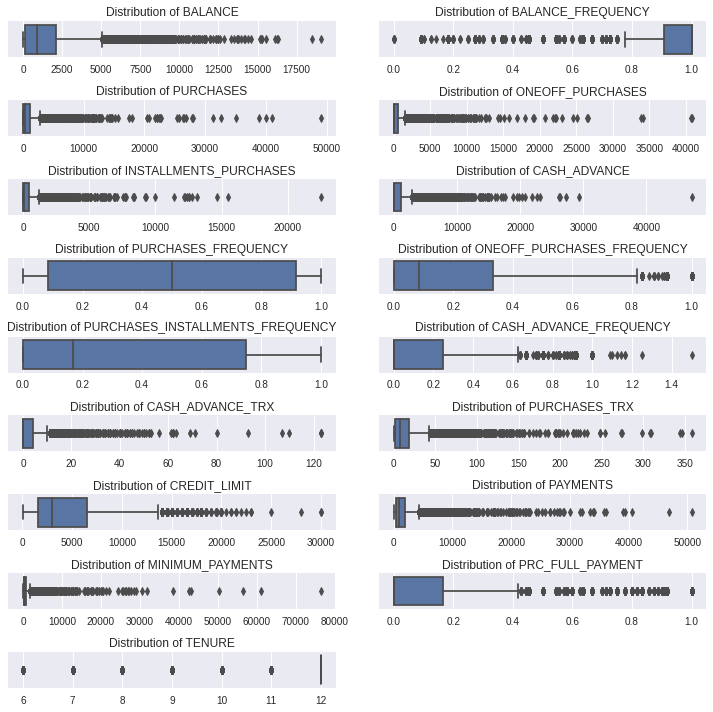

In [81]:
fig = plt.figure(figsize=(10,10))
for i,columns in enumerate(df_3.columns, 1):
    ax = plt.subplot(9,2,i)
    sns.boxplot(data = data, x = data[columns],)
    ax.set_xlabel(None)
    ax.set_title (f'Distribution of {columns}')
    plt.tight_layout(w_pad = 3)
plt.show

Dealing with outliers using upper and lower limits, and turning the outliers to the median

In [82]:
df_4 = df_3.copy()

In [83]:
for i in df_4.columns:
    upper_limit = df_4[i].mean() + 3*df_4[i].std()
    lower_limit = df_4[i].mean() - 3*df_4[i].std()
    df_4[i] = np.where(
        df_4[i] > upper_limit,
        df_4[i].median(),
        np.where(
        df_4[i] < lower_limit,
        df_4[i].median(),
        df_4[i]
        )
    )

<function matplotlib.pyplot.show(close=None, block=None)>

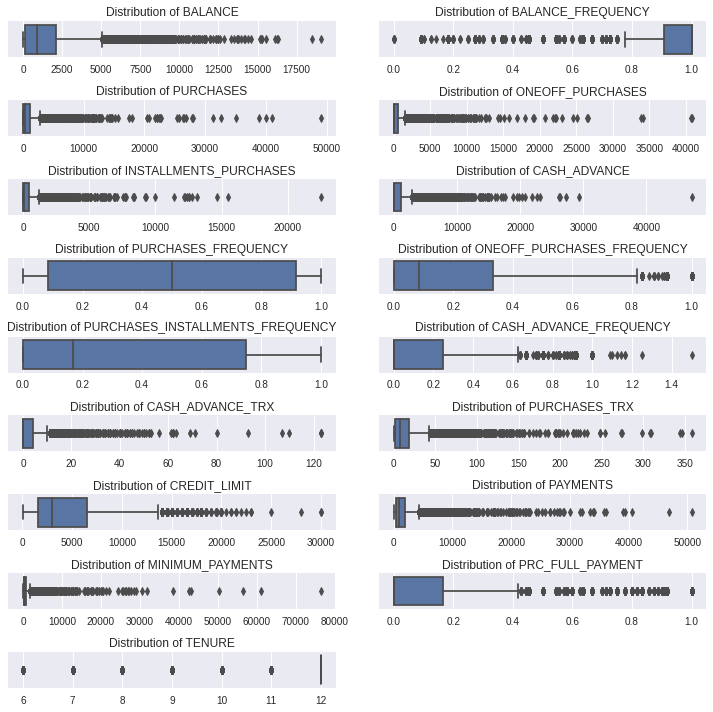

In [84]:
fig = plt.figure(figsize=(10,10))
for i,columns in enumerate(df_4.columns, 1):
    ax = plt.subplot(9,2,i)
    sns.boxplot(data = data, x = data[columns],)
    ax.set_xlabel(None)
    ax.set_title (f'Distribution of {columns}')
    plt.tight_layout(w_pad = 3)
plt.show

There still some outliers so we will try to use PyOD library

In [85]:
abod_model = ABOD(contamination=0.1, method='fast', n_neighbors=10)
abod_model.fit(df_4)

pred = abod_model.predict(df_4)

In [86]:
df_5 = df_4.copy()

In [87]:
df_5.drop(pred, axis = 0, inplace = True)

**Clustering**

In [88]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics


In [89]:
def get_sil_score(df):
  silhoutte_coefs = []

  for k in range(2, 21):
      scaler = StandardScaler()
      X = scaler.fit_transform(df)
      model = KMeans(n_clusters = k, **kmeans_constants)
      model.fit(X)
      silhoutte_coefs.append(metrics.silhouette_score(X, model.labels_))
  return silhoutte_coefs.index(max(silhoutte_coefs)) + 2

In [90]:
def clusters(df_name,df_n, k):
  scaler = StandardScaler()
  df = scaler.fit_transform(df_n)
  pca = PCA(2)
  X = pca.fit_transform(df)
  model = KMeans(n_clusters = k, **kmeans_constants)
  model.fit(X)
  label = model.labels_
  u_labels = np.unique(label)
  for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
  plt.legend()
  plt.title(f'Clusters on PCA projection {df_name}')
  plt.show()

In [91]:
k1 = get_sil_score(df_1)
k2 = get_sil_score(df_2)
k3 = get_sil_score(df_3)
k4 = get_sil_score(df_4)
k5 = get_sil_score(df_5)

In [102]:
print(k1, k2, k3 ,k4, k5)

3 3 3 2 2


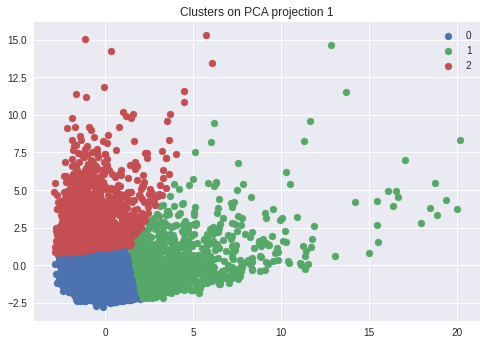

In [115]:
clusters('1', df_1 , k1)

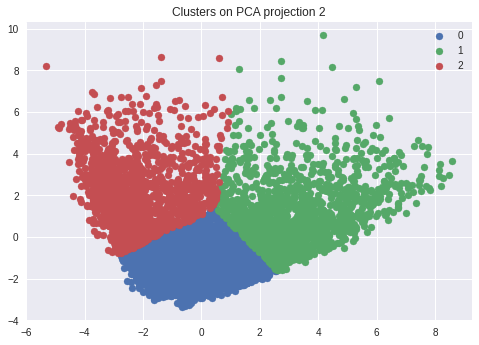

In [116]:
clusters('2',df_2, k1)

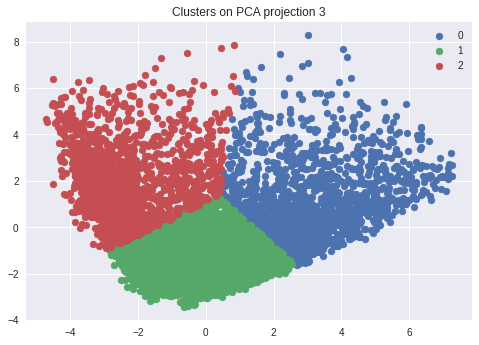

In [117]:
clusters('3', df_3, k1)

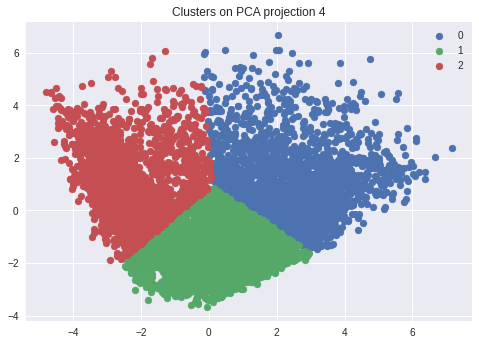

In [118]:
clusters('4', df_4, k1)

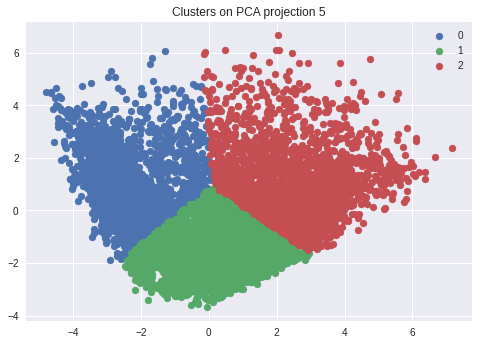

In [119]:
clusters('5', df_5, k1)